In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('BAJFINANCE.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJAUTOFIN,EQ,03 01 2000,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,380380.0,NaN,,
1,BAJAUTOFIN,EQ,04 01 2000,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,242800.0,NaN,,
2,BAJAUTOFIN,EQ,05 01 2000,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,159145.0,NaN,,
3,BAJAUTOFIN,EQ,06 01 2000,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,275475.0,NaN,,
4,BAJAUTOFIN,EQ,07 01 2000,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,155555.0,NaN,,


In [10]:
df.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

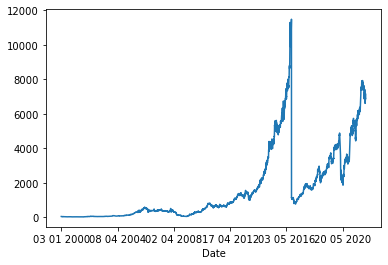

In [11]:
df['Average Price'].plot()

In [12]:
df.shape

(5407, 14)

In [13]:
df.isna().sum()

Symbol                       0
Series                       0
Prev Close                   0
Open Price                   0
High Price                   0
Low Price                    0
Last Price                   0
Close Price                  0
Average Price                0
Total Traded Quantity        0
Turnover                     0
No. of Trades             2780
Deliverable Qty              6
% Dly Qt to Traded Qty       6
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [17]:
df.shape

(2627, 14)

In [18]:
data = df.copy()

In [19]:
data.dtypes

Symbol                     object
Series                     object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades             float64
Deliverable Qty            object
% Dly Qt to Traded Qty     object
dtype: object

In [20]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [21]:
lag_features = ['High Price', 'Low Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades']
window_size1 = 3
window_size2 = 7

In [22]:
for feature in lag_features:
    data[feature+'rolling_mean_3'] = data[feature].rolling(window=window_size1).mean()
    data[feature+'rolling_mean_7'] = data[feature].rolling(window=window_size2).mean()

In [23]:
for feature in lag_features:
    data[feature+'rolling_std_3'] = data[feature].rolling(window=window_size1).std()
    data[feature+'rolling_std_7'] = data[feature].rolling(window=window_size2).std()

In [24]:
data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,High Pricerolling_std_3,High Pricerolling_std_7,Low Pricerolling_std_3,Low Pricerolling_std_7,Total Traded Quantityrolling_std_3,Total Traded Quantityrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,No. of Tradesrolling_std_3,No. of Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
01 06 2011,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02 06 2011,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03 06 2011,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+07,NaN,670.500559,NaN
06 06 2011,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+07,NaN,148.769396,NaN
07 06 2011,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+07,NaN,78.270897,NaN


In [25]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'High Pricerolling_mean_3',
       'High Pricerolling_mean_7', 'Low Pricerolling_mean_3',
       'Low Pricerolling_mean_7', 'Total Traded Quantityrolling_mean_3',
       'Total Traded Quantityrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'No. of Tradesrolling_mean_3',
       'No. of Tradesrolling_mean_7', 'High Pricerolling_std_3',
       'High Pricerolling_std_7', 'Low Pricerolling_std_3',
       'Low Pricerolling_std_7', 'Total Traded Quantityrolling_std_3',
       'Total Traded Quantityrolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7', 'No. of Tradesrolling_std_3',
       'No. of Tradesrolling_std_7'],
      dtype='object')

In [26]:
data.shape

(2627, 34)

In [27]:
data.isna().sum()

Symbol                                 0
Series                                 0
Prev Close                             0
Open Price                             0
High Price                             0
Low Price                              0
Last Price                             0
Close Price                            0
Average Price                          0
Total Traded Quantity                  0
Turnover                               0
No. of Trades                          0
Deliverable Qty                        0
% Dly Qt to Traded Qty                 0
High Pricerolling_mean_3               2
High Pricerolling_mean_7               6
Low Pricerolling_mean_3                2
Low Pricerolling_mean_7                6
Total Traded Quantityrolling_mean_3    2
Total Traded Quantityrolling_mean_7    6
Turnoverrolling_mean_3                 2
Turnoverrolling_mean_7                 6
No. of Tradesrolling_mean_3            2
No. of Tradesrolling_mean_7            6
High Pricerollin

In [28]:
data.dropna(inplace=True)

In [29]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'High Pricerolling_mean_3',
       'High Pricerolling_mean_7', 'Low Pricerolling_mean_3',
       'Low Pricerolling_mean_7', 'Total Traded Quantityrolling_mean_3',
       'Total Traded Quantityrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'No. of Tradesrolling_mean_3',
       'No. of Tradesrolling_mean_7', 'High Pricerolling_std_3',
       'High Pricerolling_std_7', 'Low Pricerolling_std_3',
       'Low Pricerolling_std_7', 'Total Traded Quantityrolling_std_3',
       'Total Traded Quantityrolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7', 'No. of Tradesrolling_std_3',
       'No. of Tradesrolling_std_7'],
      dtype='object')

In [30]:
independent_features = ['High Pricerolling_mean_3',
       'High Pricerolling_mean_7', 'Low Pricerolling_mean_3',
       'Low Pricerolling_mean_7', 'Total Traded Quantityrolling_mean_3',
       'Total Traded Quantityrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'No. of Tradesrolling_mean_3',
       'No. of Tradesrolling_mean_7', 'High Pricerolling_std_3',
       'High Pricerolling_std_7', 'Low Pricerolling_std_3',
       'Low Pricerolling_std_7', 'Total Traded Quantityrolling_std_3',
       'Total Traded Quantityrolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7', 'No. of Tradesrolling_std_3',
       'No. of Tradesrolling_std_7']

In [31]:
training_data = data[0:2100]
testing_data = data[2100:]

In [32]:
training_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,High Pricerolling_std_3,High Pricerolling_std_7,Low Pricerolling_std_3,Low Pricerolling_std_7,Total Traded Quantityrolling_std_3,Total Traded Quantityrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,No. of Tradesrolling_std_3,No. of Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
09 06 2011,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+06,1.155773e+07,354.841279,463.942320
10 06 2011,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+06,1.136003e+07,272.875429,448.020620
13 06 2011,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+06,1.123423e+07,557.373603,464.778596
14 06 2011,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+06,8.397765e+06,656.385050,455.234163
15 06 2011,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+06,7.983186e+06,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26 11 2019,BAJFINANCE,EQ,4141.70,4145.00,4173.95,4087.00,4097.90,4098.35,4123.85,1502727,...,16.086666,22.644126,23.020933,38.064555,140897.558646,313470.930613,6.038112e+08,1.274586e+09,2654.910168,6643.716892
27 11 2019,BAJFINANCE,EQ,4098.35,4121.00,4124.90,4095.00,4124.00,4118.35,4112.85,485064,...,24.525514,21.521517,17.045918,32.497211,557696.562672,380917.164963,2.297849e+09,1.559106e+09,22037.515793,13267.438266
28 11 2019,BAJFINANCE,EQ,4118.35,4120.00,4139.05,4065.00,4107.00,4102.05,4100.38,969708,...,25.245907,20.050306,15.534907,30.215992,509023.090941,374567.144498,2.102155e+09,1.535201e+09,26884.500002,16423.526416


In [33]:
testing_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,High Pricerolling_std_3,High Pricerolling_std_7,Low Pricerolling_std_3,Low Pricerolling_std_7,Total Traded Quantityrolling_std_3,Total Traded Quantityrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,No. of Tradesrolling_std_3,No. of Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
03 12 2019,BAJFINANCE,EQ,3950.45,3939.95,3995.00,3886.50,3965.00,3964.55,3958.17,1984382,...,70.362212,59.887685,93.351705,84.965742,689917.311824,590647.569863,2.674114e+09,2.314284e+09,31279.357943,30730.591386
04 12 2019,BAJFINANCE,EQ,3964.55,3958.00,4004.10,3935.00,3990.15,3990.85,3971.90,1430830,...,45.147711,69.769691,24.843577,89.281334,345366.602966,591686.403345,1.361573e+09,2.313637e+09,22968.809830,30454.162608
05 12 2019,BAJFINANCE,EQ,3990.85,3990.85,4034.00,3968.00,3982.30,3990.85,3994.45,1255304,...,20.403513,62.277577,40.994918,82.655146,380522.431109,586619.618807,1.484902e+09,2.282606e+09,20812.681863,30213.908811
06 12 2019,BAJFINANCE,EQ,3990.85,4010.00,4027.80,3927.40,3958.95,3951.65,3974.18,1171355,...,15.780473,59.482638,21.583636,70.670071,132403.478619,476976.833097,5.216900e+08,1.848044e+09,7424.707559,22923.272806
09 12 2019,BAJFINANCE,EQ,3951.65,3969.60,3971.45,3880.25,3948.40,3944.85,3934.48,1268942,...,34.463181,55.437295,43.915724,61.597595,52846.715782,445731.199132,2.013637e+08,1.741611e+09,9102.411018,22943.142036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28 12 2021,BAJFINANCE,EQ,6890.75,6980.00,6980.00,6861.75,6904.00,6906.65,6924.52,862464,...,43.583952,98.778085,103.850144,142.968079,59396.046882,466790.525884,3.779208e+08,3.011136e+09,3663.672065,62606.951655
29 12 2021,BAJFINANCE,EQ,6906.65,6884.90,6949.95,6853.05,6906.00,6911.65,6916.26,532379,...,35.743916,99.460844,117.484737,127.852218,206491.032251,306372.446902,1.393681e+09,2.036533e+09,16521.275929,31387.238226
30 12 2021,BAJFINANCE,EQ,6911.65,6899.90,6944.95,6856.90,6869.25,6871.10,6893.66,658992,...,18.958310,70.770742,4.359568,101.701515,166527.181854,294533.741628,1.156738e+09,1.995911e+09,16111.655729,23674.459225


In [34]:
!pip install pmdarima

In [36]:
from pmdarima import auto_arima

In [39]:
model = auto_arima(y=training_data['Average Price'], exogenous = training_data[independent_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=24255.135, Time=3.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24252.963, Time=2.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24254.717, Time=2.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24254.716, Time=3.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38216.862, Time=2.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=24256.963, Time=3.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 16.682 seconds


C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [40]:
model.fit(training_data['Average Price'], training_data[independent_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [42]:
forecast = model.predict(n_periods=len(testing_data), exogenous=testing_data[independent_features])

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [43]:
testing_data['Forecast_ARIMA'] = forecast

C:\Users\nikhi\AppData\Local\Temp/ipykernel_1956/2800224349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['Forecast_ARIMA'] = forecast


<AxesSubplot:xlabel='Date'>

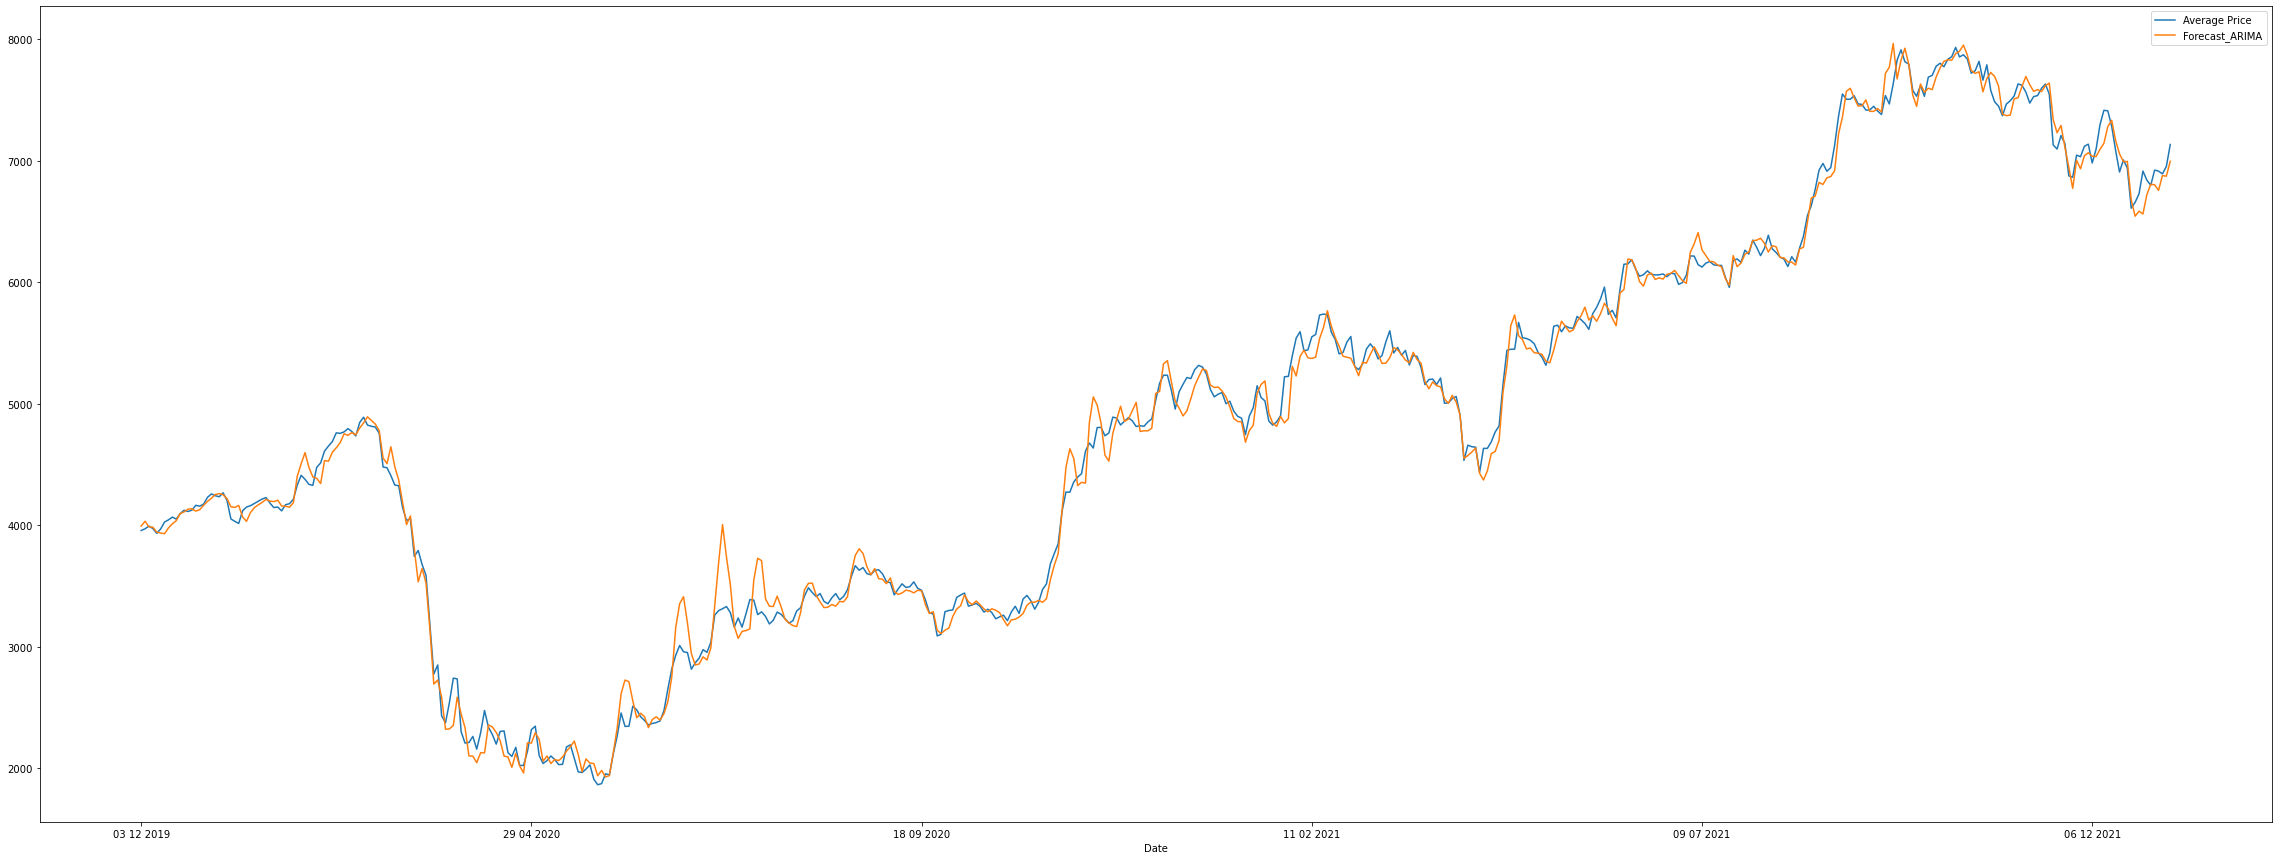

In [49]:
testing_data[['Average Price', 'Forecast_ARIMA']].plot(figsize=(40,15))

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
np.sqrt(mean_squared_error(testing_data['Average Price'], testing_data['Forecast_ARIMA']))

120.36664502074686

In [53]:
mean_absolute_error(testing_data['Average Price'], testing_data['Forecast_ARIMA'])

84.11560923552634